# Quantum Arithmetic Logic Units

As we perform quantum operations in a quantum computer, we need to use classical logic operations. This is so challenging. Alignment of gates in the given order increases the risk of error. By the way, thanks to QALU, you will add ultra complex operators only using one function

### Imports

In [1]:
from qiskit import QuantumCircuit,execute,Aer
from qiskit.visualization import plot_state_qsphere,plot_bloch_multivector

## Simulation Environment

In [2]:
be=Aer.get_backend("statevector_simulator")

## AND Gate

In [3]:
def and_(circ,a,b,out):
    circ.ccx(a,b,out)

## OR Gate

In [4]:
def or_(circ,a,b,out):
    circ.cx(a,out)
    circ.cx(b,out)
    circ.ccx(a,b,out)

## XOR Gate

In [5]:
def xor_(circ,a,b,out):
    circ.cx(a,out)
    circ.cx(b,out)

## NAND Gate

In [6]:
def nand_(circ,a,b,out):
    circ.ccx(a,b,out)
    circ.x(out)

## NOR Gate

In [7]:
def nor_(circ,a,b,out):
    circ.cx(a,out)
    circ.cx(b,out)
    circ.ccx(a,b,out)
    circ.x(out)

## XNOR Gate

In [8]:
def xnor_(circ,a,b,out):
    circ.cx(a,out)
    circ.cx(b,out)
    circ.x(out)

## Visualize the gates

'AND'

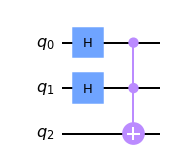

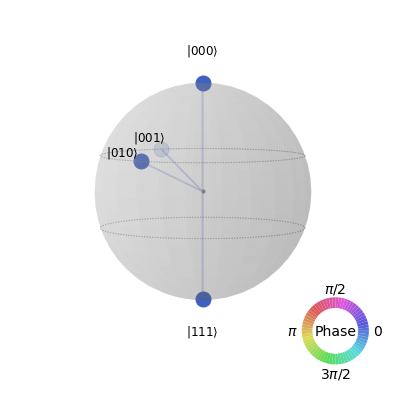

'NAND'

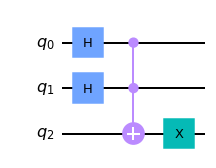

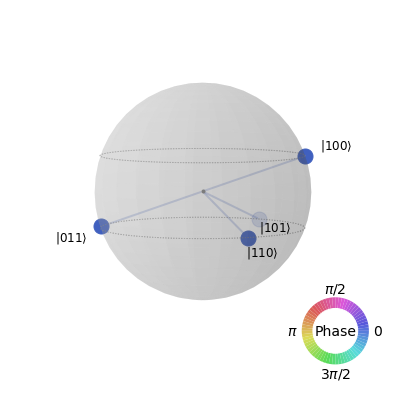

'OR'

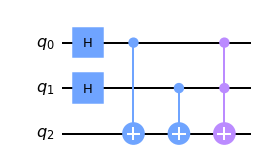

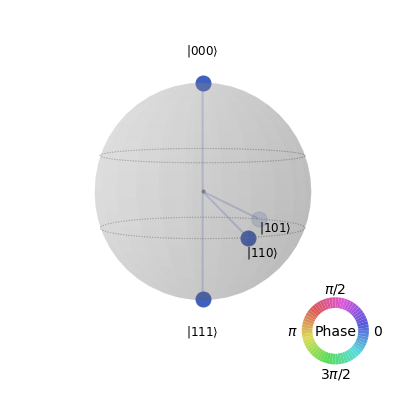

'NOR'

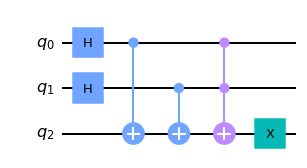

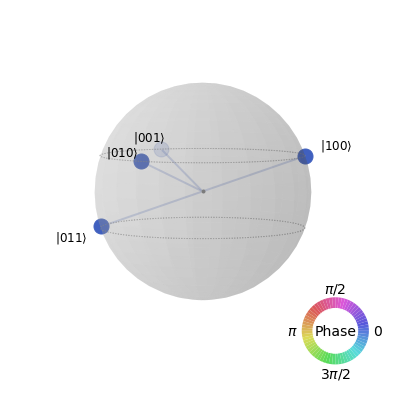

'XOR'

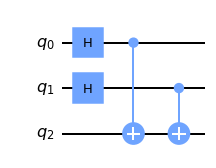

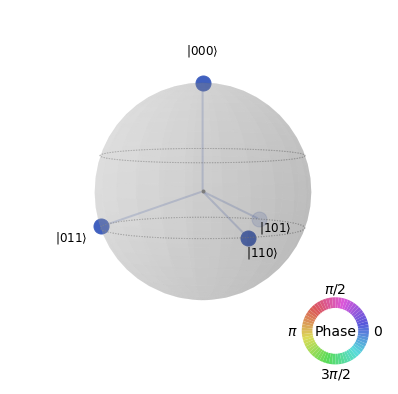

'XNOR'

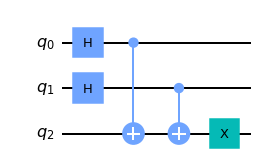

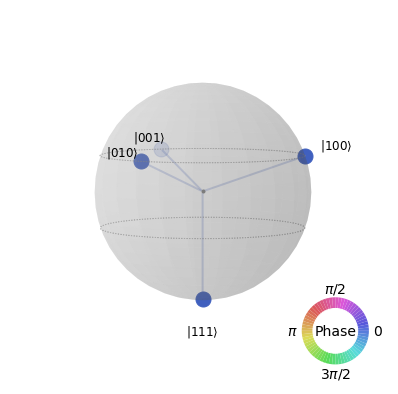

In [9]:
qc=QuantumCircuit(3)
qc.h(0)
qc.h(1)
and_(qc,0,1,2)
display("AND",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

qc=QuantumCircuit(3)
qc.h(0)
qc.h(1)
nand_(qc,0,1,2)
display("NAND",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

qc=QuantumCircuit(3)
qc.h(0)
qc.h(1)
or_(qc,0,1,2)
display("OR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

qc=QuantumCircuit(3)
qc.h(0)
qc.h(1)
nor_(qc,0,1,2)
display("NOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

qc=QuantumCircuit(3)
qc.h(0)
qc.h(1)
xor_(qc,0,1,2)
display("XOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

qc=QuantumCircuit(3)
qc.h(0)
qc.h(1)
xnor_(qc,0,1,2)
display("XNOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

## Arithmetic Operators
## Half Adder
**circ** is the QuantumCircuit that you add adder on it. **a**,**b** are inputs, **carry** is carry out and **sum_** is sum of **a+b**. You will feed **a**,**b**, **carry**, **out** variables with number of the spesific qubits.

In [10]:
def half_adder(circ, a, b, carry,sum_):
    xor_(circ,a,b,sum_)
    and_(circ,a,b,carry)

## Full Adder

**circ** is the QuantumCircuit that you add adder on it. **a**,**b** are inputs, **c_in** is carry in, **c_out** is carry out and **out** is the sum. You will feed **a**,**b**, **c_in**, **c_out**,**t_0**, **t_1**, **t_2** variables with number of the spesific qubits.
**t_0**, **t_1** and **t_2** are temporary used qubits for computation. They don't represent any result but it's necessary for operations.

In [11]:
def full_adder(circ,a,b,c_in,t_0,t_1,t_2,c_out,sum_):
    xor_(circ,a,b,t_0)
    xor_(circ,t_0,c_in,sum_)
    and_(circ,a,b,t_1)
    and_(circ,c_in,t_0,t_2)
    or_(circ,t_1,t_2,c_out)
    circ.ccx(c_in,t_0,t_2)
    circ.cx(a,t_0)
    circ.cx(b,t_0)
    circ.ccx(a,b,t_1)

## Half Subtractor

**circ** is the QuantumCircuit that you add adder on it. **a**,**b** are inputs, **carry** is carry out,  and **diff** is difference of "**a-b** . You will feed **a**,**b**, **carry**, **out** variables with number of the spesific qubits.

In [12]:
def half_subtractor(circ, a, b, carry, diff):
    xor_(circ,a,b,diff)
    circ.ccx(b,diff,carry)

## Full Subtractor
**circ** is the QuantumCircuit that you add adder on it. **a**,**b** are inputs, **c_in** is carry in, **c_out** is carry out and **out** is the sum. You will feed **a**,**b**, **c_in**, **c_out**,**t_0**, **t_1**, **t_2** variables with number of the spesific qubits.
**t_0**, **t_1** and **t_2** are temporary used qubits for computation. They don't represent any result but it's necessary for operations.

In [13]:
def full_subtractor(circ,a,b,c_in,t_0,t_1,t_2,c_out,diff):
    xor_(circ,a,b,t_0)
    xor_(circ,t_0,c_in,diff)
    circ.x(a)
    circ.ccx(a,b,t_1)
    circ.x(t_0)
    circ.ccx(t_0,c_in,t_2)
    or_(circ,t_1,t_2,c_out)
    
    circ.ccx(c_in,t_0,t_2)
    circ.ccx(a,b,t_1)
    circ.x(t_0)
    circ.x(a)
    circ.cx(a,t_0)
    circ.cx(b,t_0)

## Visualize Arithmetic Operations

'HALF ADDER'

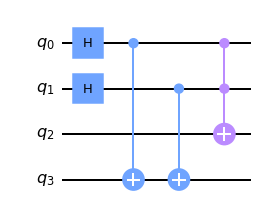

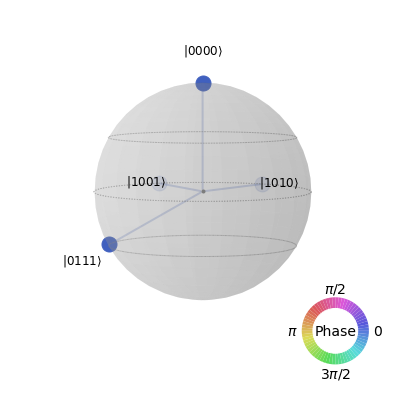

'FULL ADDER'

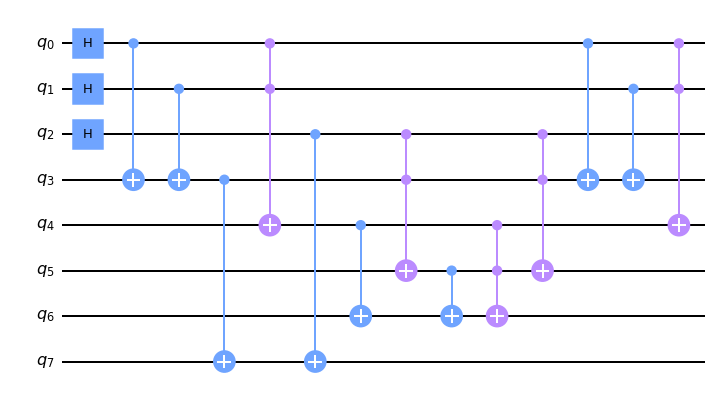

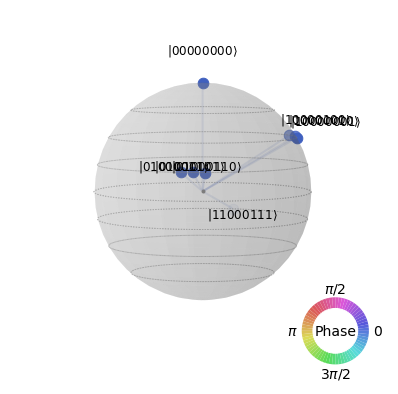

'HALF SUBTRACTOR'

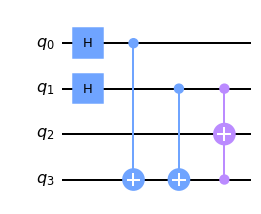

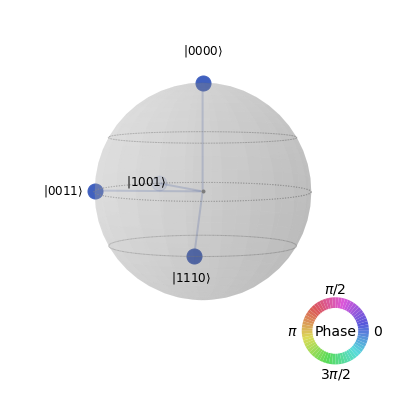

'FULL SUBTRACTOR'

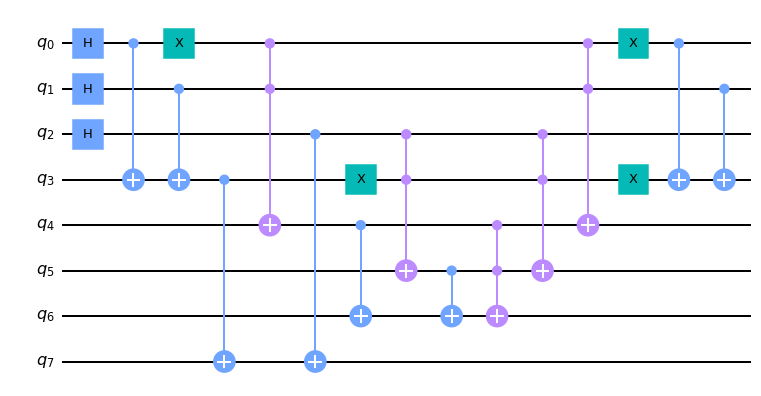

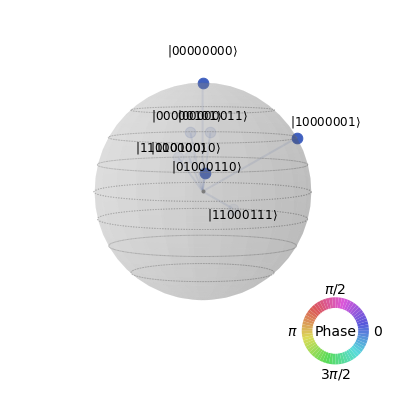

In [14]:
qc=QuantumCircuit(4)
qc.h(0)
qc.h(1)

half_adder(qc,0,1,2,3)
display("HALF ADDER",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))


qc=QuantumCircuit(8)
qc.h(0)
qc.h(1)
qc.h(2)

full_adder(qc,0,1,2,3,4,5,6,7)
display("FULL ADDER",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

qc=QuantumCircuit(4)
qc.h(0)
qc.h(1)

half_subtractor(qc,0,1,2,3)
display("HALF SUBTRACTOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))


qc=QuantumCircuit(8)
qc.h(0)
qc.h(1)
qc.h(2)

full_subtractor(qc,0,1,2,3,4,5,6,7)
display("FULL SUBTRACTOR",qc.draw("mpl"))
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))